# Case study: Logistic regresson Tmall 


# 1 Data analysis

In [1]:
#import module and library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

coupon = pd.read_csv('tianmao.csv')
coupon.head(10) # read first 10 lines 

,ID,age,job,marriage,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
0,1,43,management,married,no,yes,no,2,0,0
1,2,42,technician,divorced,no,yes,no,1,1,0
2,3,47,admin.,married,no,yes,yes,2,0,0
3,4,28,management,single,no,yes,yes,2,0,0
4,5,42,technician,divorced,no,yes,no,5,0,0
5,6,56,services,divorced,no,no,no,1,0,0
6,7,32,management,single,no,no,no,4,0,0
7,8,33,management,single,no,no,no,2,0,0
8,9,32,technician,single,no,yes,yes,3,0,0
9,10,55,management,married,no,no,yes,3,0,0


In [2]:
#check total columns and lines 
coupon.shape

(25317, 10)

In [3]:
#check if there is missing values 
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          25317 non-null  int64 
 1   age                         25317 non-null  int64 
 2   job                         25317 non-null  object
 3   marriage                    25317 non-null  object
 4   default                     25317 non-null  object
 5   returned                    25317 non-null  object
 6   loan                        25317 non-null  object
 7   coupon_used_in_last6_month  25317 non-null  int64 
 8   coupon_used_in_last_month   25317 non-null  int64 
 9   coupon_ind                  25317 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


## There is no missing values 

## 1.2 Clean data 

### 1.2.1 categorial variables 

In [4]:
# change categorical variables: default, returned and loan to numercical varaibles 
#make these three varaibles get_dummies()
coupon1 = coupon[['default','returned','loan']]
coupon1 = pd.get_dummies(coupon1)
coupon1.head()

,default_no,default_yes,returned_no,returned_yes,loan_no,loan_yes
0,1,0,0,1,1,0
1,1,0,0,1,1,0
2,1,0,0,1,0,1
3,1,0,0,1,0,1
4,1,0,0,1,1,0


In [5]:
#concat two kinds data
coupon = pd.concat([coupon, coupon1], axis = 1)
coupon.head(10)

,ID,age,job,marriage,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind,default_no,default_yes,returned_no,returned_yes,loan_no,loan_yes
0,1,43,management,married,no,yes,no,2,0,0,1,0,0,1,1,0
1,2,42,technician,divorced,no,yes,no,1,1,0,1,0,0,1,1,0
2,3,47,admin.,married,no,yes,yes,2,0,0,1,0,0,1,0,1
3,4,28,management,single,no,yes,yes,2,0,0,1,0,0,1,0,1
4,5,42,technician,divorced,no,yes,no,5,0,0,1,0,0,1,1,0
5,6,56,services,divorced,no,no,no,1,0,0,1,0,1,0,1,0
6,7,32,management,single,no,no,no,4,0,0,1,0,1,0,1,0
7,8,33,management,single,no,no,no,2,0,0,1,0,1,0,1,0
8,9,32,technician,single,no,yes,yes,3,0,0,1,0,0,1,0,1
9,10,55,management,married,no,no,yes,3,0,0,1,0,1,0,0,1


In [6]:
# remove id, default, etc that are useless value 
coupon.drop(['ID', 'default', 'default_no', 'returned', 'returned_no', 'loan', 'loan_no'], axis = 1, inplace = True)
#rename coupon_ind to flag
coupon = coupon.rename(columns = {'coupon_ind' : 'flag'})
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         25317 non-null  int64 
 1   job                         25317 non-null  object
 2   marriage                    25317 non-null  object
 3   coupon_used_in_last6_month  25317 non-null  int64 
 4   coupon_used_in_last_month   25317 non-null  int64 
 5   flag                        25317 non-null  int64 
 6   default_yes                 25317 non-null  uint8 
 7   returned_yes                25317 non-null  uint8 
 8   loan_yes                    25317 non-null  uint8 
dtypes: int64(4), object(2), uint8(3)
memory usage: 1.2+ MB


# 2  Univariate analysis

## 2.1 Observe balance of 'flag' samples 0 and 1

In [7]:
#check balance of (flag)0,1
coupon['flag'].value_counts(1)

0    0.883043
1    0.116957
Name: flag, dtype: float64

- In the binary classification problem, the proportion of 0 and 1 should be balanced, and in actual situations it should not be less than 0.05, otherwise it will affect the prediction of the model. 
- The proportions of 0 and 1 in this data set are both higher than 0.05, so the distribution is reasonable.

## 2.2 Observe the mean value 

In [8]:
# check whether customers use coupons for classification and aggregation
summary = coupon.groupby(['flag'])
#Calculate the proportion of the average value of various situations
summary.mean()

,age,coupon_used_in_last6_month,coupon_used_in_last_month,default_yes,returned_yes,loan_yes
flag,,,,,,
0,40.819601,2.857846,0.260378,0.018876,0.579755,0.169037
1,41.809524,2.124282,0.537994,0.008781,0.357649,0.094563


## 2.3 Visualization

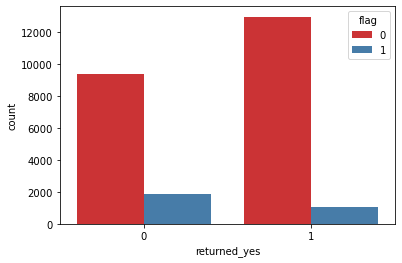

In [9]:
#obeserve distribution of returned_yes in flag
sns.countplot(x = 'returned_yes', hue = 'flag', data = coupon, palette = "Set1")
plt.show()

- Compared with customers who have not returned goods, customers who return goods are less likely to use coupons. 

<AxesSubplot:xlabel='marriage', ylabel='count'>

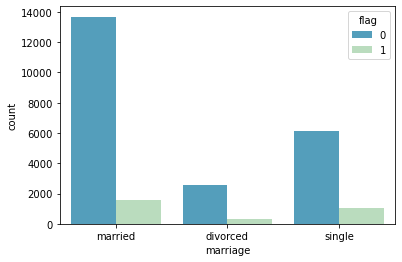

In [10]:
# observe distribution pf marriage on flag
sns.countplot(x = 'marriage', hue = 'flag', data = coupon, palette = "GnBu_r")

- Married customers are slightly more likely to use coupons than unmarried and divorced customers.
- Married people have a higher probability of not using coupons than unmarried people.

<AxesSubplot:xlabel='count', ylabel='job'>

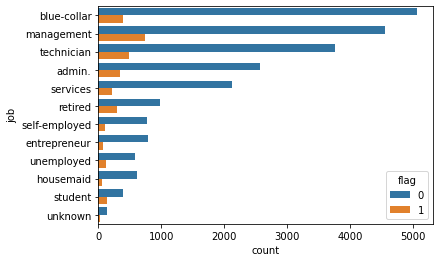

In [11]:
#observe distribution of job on flag
sns.countplot(y = 'job', hue = 'flag', data = coupon, order = coupon['job'].value_counts().index)

- Customers whose job title are management, technician, blue-collar are more likely to use coupon. 

/Users/zhijiewei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

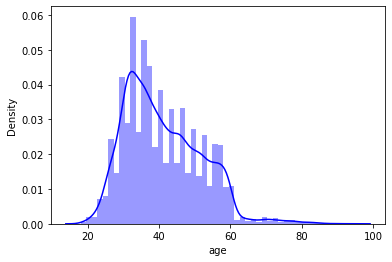

In [12]:
# observe distribution of age on flag 
sns.distplot(coupon['age'], color ="blue")

In [13]:
#observe distribution of age 
coupon['age'].describe()

count    25317.000000
mean        40.935379
std         10.634289
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

- The data shows that the customer cluster with a higher probability of using coupons is 40 years old.
- It is found that age > 60 years old has fewer extreme values, but they affect the overall data distribution, and these needs to be excluded from the scope of analysis. 

In [14]:
# group ages and explore the influence of each age group on whether to use coupon
age60 = coupon[coupon['age'] < 60]
bins = [0, 20, 40, 60]
labels = ['<20','<40','<60']
age60['age_new'] = pd.cut(age60.age, bins, right=False,labels = labels)
age60.groupby(['age_new'])['age'].describe()

<ipython-input-14-bb3ee45a54d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age60['age_new'] = pd.cut(age60.age, bins, right=False,labels = labels)


,count,mean,std,min,25%,50%,75%,max
age_new,,,,,,,,
<20,25.0,18.760000,0.435890,18.0,19.0,19.0,19.0,19.0
<40,13063.0,32.569624,4.130196,20.0,30.0,33.0,36.0,39.0
<60,11215.0,48.416942,5.720111,40.0,43.0,48.0,53.0,59.0


In [15]:
age60['age_new'].describe()

count     24303
unique        3
top         <40
freq      13063
Name: age_new, dtype: object

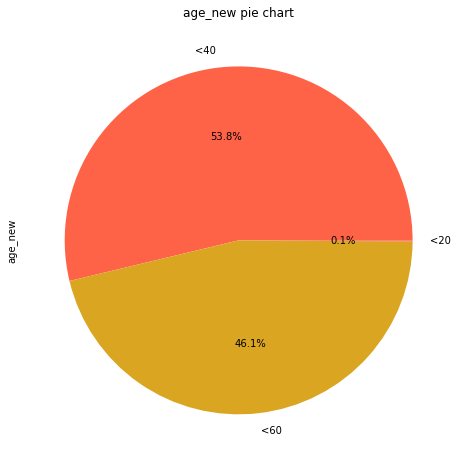

In [16]:
# draw pie chart for age60
plt.figure(figsize=[10,8])
age60['age_new'].value_counts().plot.pie(colors = ['tomato','goldenrod'], autopct='%1.1f%%')
plt.title("age_new pie chart")
plt.show()

- The 20-40 year old customer group has the highest probability of using coupon
- 18, 32, and 48 years old are the average ages with the highest probability of using coupon among the three age groups.

# 3 Relevant and visualization 

In [17]:
#check correlation between flag and other variables 
coupon.corr()[['flag']].sort_values('flag', ascending = False)
#coupon.corr().sort_values(by='age', ascending = False)

,flag
flag,1.000000
coupon_used_in_last_month,0.116550
age,0.029916
default_yes,-0.024608
loan_yes,-0.065231
coupon_used_in_last6_month,-0.075173
returned_yes,-0.143589


<AxesSubplot:>

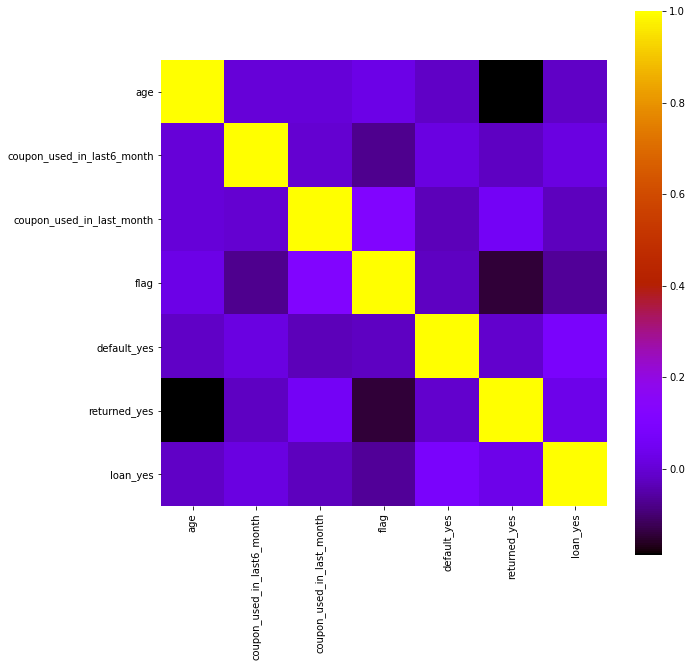

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(coupon.corr(),vmax=1,square=True  ,cmap = 'gnuplot')

- flag has strong pairwise positive relations with coupon_used_in_last_month and age. 
- flag has strong pairwise negative relations with coupon_used_in_last6_month and returned_yes.

# 4 Establish logistic regression and evaluate 

## 4.1 build model 


### 4.1.1 Split training set and test set

In [19]:
#declare x and y 
x = coupon[['coupon_used_in_last_month', 'returned_yes', 'loan_yes']]
y = coupon['flag']

In [20]:
# split dataset, ratio between training set and test set is 7:3 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100) 

#import logistic regression module
from sklearn import linear_model
lr = linear_model.LogisticRegression()

#fit
lr.fit(x_train, y_train)

LogisticRegression()

### 4.1.2 查看模型结果

In [21]:
#check coefficiency
lr.coef_

array([[ 0.38674154, -0.95906584, -0.56226592]])

In [22]:
#check intercept
lr.intercept_

array([-1.63641623])

- when coupon_used_in_last_month increases from 0 to 1，the probability increase from not using coupon to using coupon is e^0.3867，that is 1.46 times. 

- when returned_yes from 1 to 0，the probability increase from using coupon to not using coupon is 0.9590 times.

- when loan_yes from 1 to 0，the probability increase from using coupon to not using coupon is 0.5622 times.
- Therefore, from the perspective of probability, customers who have used coupons last month, customers who have not returned goods, and customers who have not paid with ANT credit pay will have a higher probability of using coupon again.

## 4.2 Evaluate model 

### Compute accuracy score

In [23]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [24]:
# create confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_train, y_pred_train)

array([[15596,    27],
       [ 2092,     6]])

In [25]:
#check accuracy score 
trainingset_score = metrics.accuracy_score(y_train, y_pred_train)
print(trainingset_score )

0.8804243552846904


In [26]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[6722,   11],
       [ 862,    1]])

In [27]:
testset_score = metrics.accuracy_score(y_test, y_pred_test)
print(testset_score )

0.8850710900473934


In [28]:
# print both scores 
both_scores = {'Training set score': [trainingset_score],
              'Test set score': [testset_score]}

score_df = pd.DataFrame(data = both_scores)
score_df

,Training set score,Test set score
0,0.880424,0.885071


## 4.3 Model refinement 

In [29]:
#add three more variables in x
x = coupon[['coupon_used_in_last_month', 'returned_yes', 'loan_yes', 'coupon_used_in_last6_month', 'default_yes', 'age']]
y = coupon['flag']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100) #训练集和测试集抽取比例为70/30

from sklearn import linear_model
lr = linear_model.LogisticRegression()

lr.fit(x_train, y_train)

LogisticRegression()

In [31]:
lr.coef_

array([[ 0.43301915, -0.98378702, -0.53258391, -0.1677523 , -0.53714067,
         0.00114021]])

In [32]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

trainingset_score_after = metrics.accuracy_score(y_train, y_pred_train)
print(trainingset_score_after)

testset_score_after = metrics.accuracy_score(y_test, y_pred_test)
print(testset_score_after )

0.8809886575249704
0.8858609794628752


In [33]:
both_scores = {'Training set score': [trainingset_score, trainingset_score_after ],
              'Test set score': [testset_score, testset_score_after ]}

score_df = pd.DataFrame(data = both_scores)
score_df

,Training set score,Test set score
0,0.880424,0.885071
1,0.880989,0.885861


# 5 Summary

- The data shows that 18-95 years old customers are more likely to use coupons, and the customer group with a higher probability of using coupons is 40 years old.
- The 20-40 years old customer group has the highest probability of using coupon.
- 18, 32, and 48 are the average ages with the highest probability of using coupon among < 20, < 40, < 60 age groups.